In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df=pd.read_csv(r"C:\Users\hp\Downloads\startup_funding.csv")#data load

In [38]:
df.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,AmountInUSD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SrNo              3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  2873 non-null   object
 4   SubVertical       2108 non-null   object
 5   CityLocation      2864 non-null   object
 6   InvestorsName     3020 non-null   object
 7   InvestmentnType   3040 non-null   object
 8   AmountInUSD       2084 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [40]:
df.describe()

,SrNo
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [41]:
missing_values_count = df.isnull().sum()#count of missing values
print(missing_values_count)

SrNo                   0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         180
InvestorsName         24
InvestmentnType        4
AmountInUSD          960
Remarks             2625
dtype: int64


In [42]:
df.shape

(3044, 10)

In [43]:
df=df.drop(['Remarks', 'SrNo'],axis=1)
print(df.columns)

Index(['Date ', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentnType', 'AmountInUSD'],
      dtype='object')


In [44]:
df=df.dropna()
df.isnull().sum()

Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestorsName       0
InvestmentnType     0
AmountInUSD         0
dtype: int64

In [45]:
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("undisclosed","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("unknown","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("unknown","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("Undisclosed","")
df["AmountInUSD"]=df["AmountInUSD"].str.replace("+","")


In [72]:
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])

In [71]:
df.shape

(1406, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 2103
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1406 non-null   object 
 1   StartupName       1406 non-null   object 
 2   IndustryVertical  1406 non-null   object 
 3   SubVertical       1406 non-null   object 
 4   CityLocation      1406 non-null   object 
 5   InvestorsName     1406 non-null   object 
 6   InvestmentnType   1406 non-null   object 
 7   AmountInUSD       1399 non-null   float64
dtypes: float64(1), object(7)
memory usage: 98.9+ KB


In [70]:
df.describe()

,AmountInUSD
count,1.399000e+03
mean,2.047457e+07
std,1.419738e+08
min,1.800000e+04
25%,5.000000e+05
50%,2.000000e+06
75%,8.024197e+06
max,3.900000e+09


In [50]:
df

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,AmountInUSD
0,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...
2098,29-01-2016,Qriyo,Consumer Internet,Online Fitness & Educational information Aggre...,Jodhpur,Idein Ventures,Seed Funding,160000.0
2100,29-01-2016,Aisle,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,185000.0
2101,29-01-2016,FreshMenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,17000000.0
2102,29-01-2016,Truebil,ECommerce,Online marketplace for cars,Mumbai,"Kalaari Capital, Inventus Capital, Tekton Vent...",Private Equity,5150000.0


In [73]:
df=df.dropna()
df.isnull().sum()

Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestorsName       0
InvestmentnType     0
AmountInUSD         0
dtype: int64

In [107]:
#df.to_csv(r"C:\Users\hp\Downloads\Sheet1.csv", index = False)

In [74]:
df=df.sort_values(by=['AmountInUSD'],ascending=False)

In [75]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,AmountInUSD
0,27-08-2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
1,11-08-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
2,21-03-2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,18-05-2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
4,25-11-2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09


In [63]:
df=df.drop(["index","level_0"],axis=1)

In [69]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,AmountInUSD
0,27-08-2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
1,11-08-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
2,21-03-2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,18-05-2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
4,25-11-2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09


In [76]:
funding=df[0:20]

In [77]:
funding[["StartupName","AmountInUSD"]]


,StartupName,AmountInUSD
0,Rapido Bike Taxi,3.900000e+09
1,Flipkart,2.500000e+09
2,Flipkart,1.400000e+09
3,Paytm,1.400000e+09
4,Paytm,1.000000e+09
5,Udaan,5.850000e+08
6,GOQii,4.500000e+08
7,Ola,3.300000e+08
8,BigBasket,3.000000e+08
9,Automation Anywhere,3.000000e+08


<AxesSubplot:xlabel='AmountInUSD', ylabel='StartupName'>

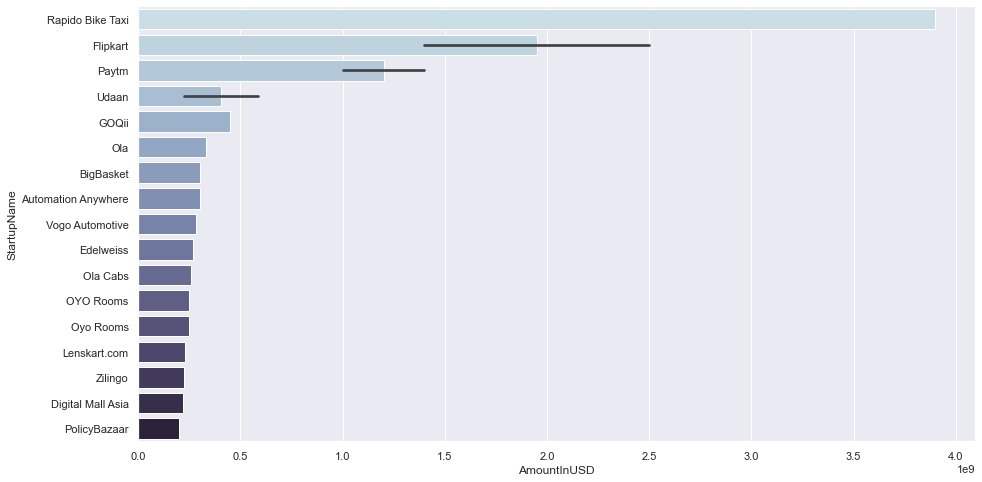

In [81]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

sns.barplot(data=funding,y="StartupName",x="AmountInUSD",palette="ch:s=.25,rot=-.25")

In [82]:
start_INtype=df["InvestmentnType"].value_counts()[0:20].reset_index()

In [83]:
start_INtype

,index,InvestmentnType
0,Private Equity,718
1,Seed Funding,438
2,Seed/ Angel Funding,45
3,Seed / Angel Funding,32
4,Series A,22
5,Debt Funding,22
6,Series B,20
7,Seed/Angel Funding,17
8,Series C,14
9,Series D,12


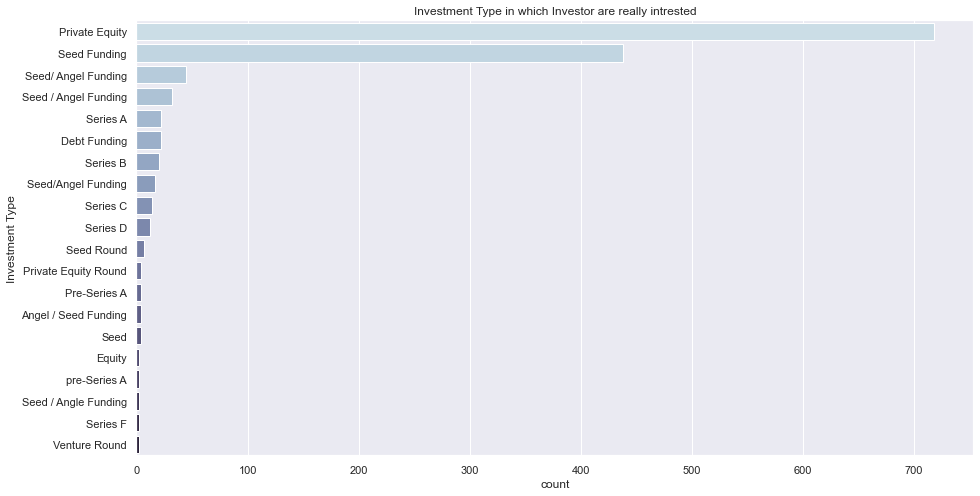

In [86]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

sns.barplot(data=start_INtype,y="index",x="InvestmentnType",palette="ch:s=.25,rot=-.25")
plt.title("Investment Type in which Investor are really intrested")
plt.xlabel("count")
plt.ylabel("Investment Type")
plt.show()

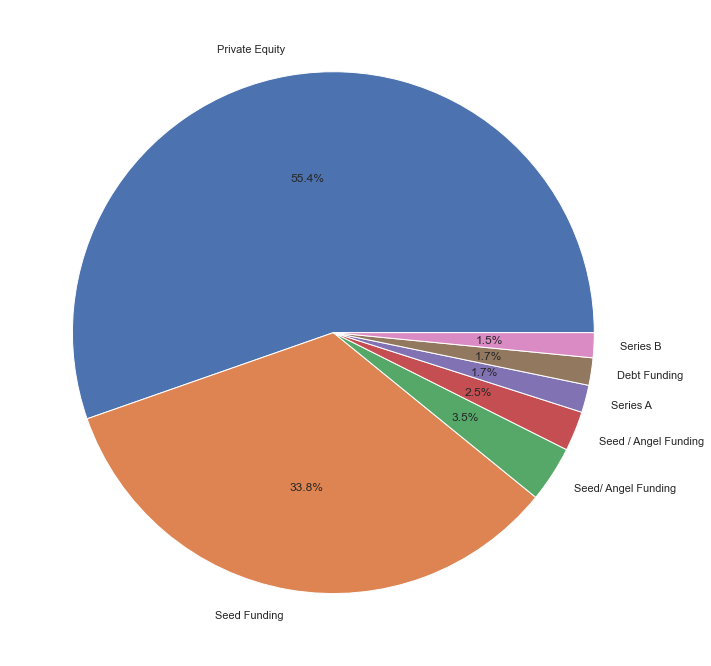

In [89]:
plt.figure(figsize=(15,12))
plt.pie(start_INtype["InvestmentnType"][0:7],labels=start_INtype["index"][0:7],autopct="%0.1f%%")
plt.show()

In [90]:
start_indver=df["IndustryVertical"].value_counts().reset_index()[0:10]


In [91]:
start_indver

,index,IndustryVertical
0,Consumer Internet,582
1,Technology,309
2,eCommerce,125
3,Finance,53
4,Healthcare,43
5,ECommerce,37
6,E-Commerce,24
7,Logistics,23
8,Education,18
9,Food & Beverage,15


Text(0, 0.5, 'Industry Vertical')

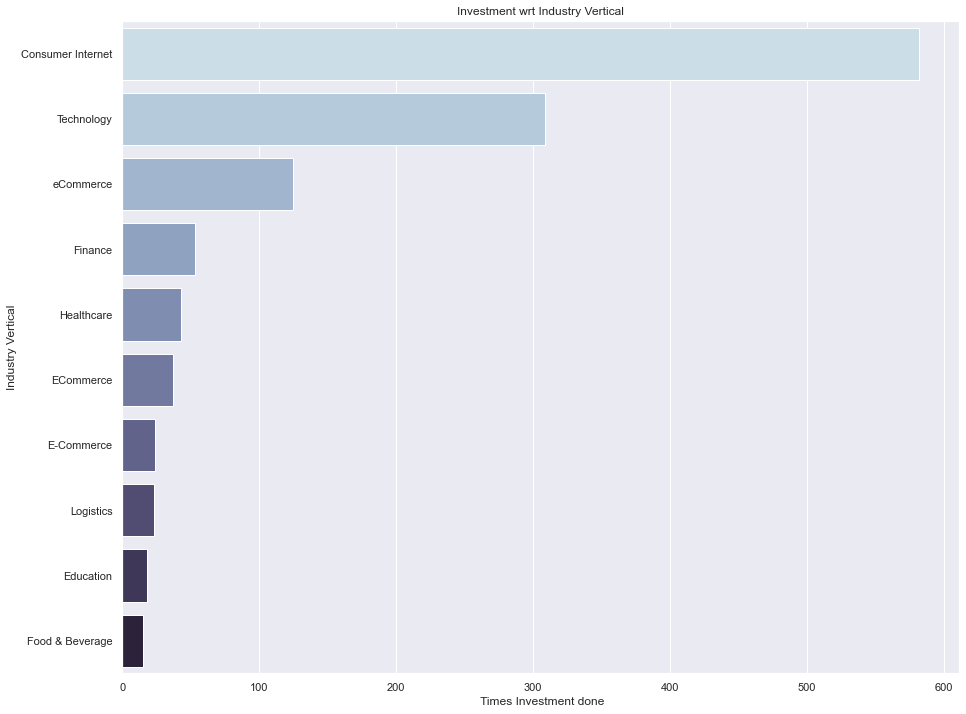

In [93]:
plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
sns.barplot(data=start_indver,y="index",x="IndustryVertical",palette="ch:s=.25,rot=-.25")
plt.title("Investment wrt Industry Vertical")
plt.xlabel(" Times Investment done")
plt.ylabel("Industry Vertical")